#### 2-dimentional animation for particles

This code produce an animation of particles.

In [3]:
#########/ data initializing /#################################################
import numpy as np
particles = []
Np = 1000

with open("particles_data.txt", 'r') as f:
    NUMBER_OF_PARTICLES = (int)(f.readline())
    TIME_dt = f.readline().split(' ')
    TIME = (int)(TIME_dt[0])
    dt = (float)(TIME_dt[1])
    SIZE_X_Y = f.readline().split(' ')
    SIZE_X = (float)(SIZE_X_Y[0])
    SIZE_Y = (float)(SIZE_X_Y[1])
    for t in range (TIME):
        temp = f.readline() 
        temp = temp.split(' ')[:-1]
        particles_t = []
        for xy_i in temp[:Np]:
            particles_t.append([float(xy_i.split(' ')[0]), float(xy_i.split(' ')[1])])
        particles.append(particles_t)

        
particles = np.asarray(particles)

IndexError: list index out of range

<IPython.core.display.Javascript object>


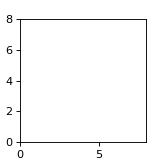

IndexError: too many indices for array

In [16]:
######### / animation /########################################################
import matplotlib.pyplot as plt
#import matplotlib.animation as animation
%matplotlib notebook

k = SIZE_X/SIZE_Y
fig = plt.figure(figsize=(2*k,2))
ax = fig.add_subplot(111, xlim=(0, SIZE_X),  ylim=(0, SIZE_Y))

twp_text = ax.text(0.45, 1.03, '', transform=ax.transAxes)
particles_, = ax.plot(particles[0,:,0], particles[0,:,1], 'bo')


delay = 0 #
delay_twp = int(delay/dt)
def redraw(i):
    global dt
    particles_.set_data(particles[i+delay_twp,:,0], particles[i+delay_twp,:,1])
    twp_text.set_text(r"$\hat{t} = $%d" % ((i+delay_twp))) #(r"$\hat{t} \cdot w_p = $%.2f" % ((i+delay_twp)*dt))
    return particles_, twp_text

anim = animation.FuncAnimation(fig,
                               redraw,
                               frames=TIME-delay_twp,
                               interval=20,
                               blit=True,
                               repeat=False,
                               )

#anim.save("evolution of heated plasma (T = 1 keV, Np = 64).mp4", writer="imagemagick", fps = 30)

plt.show()

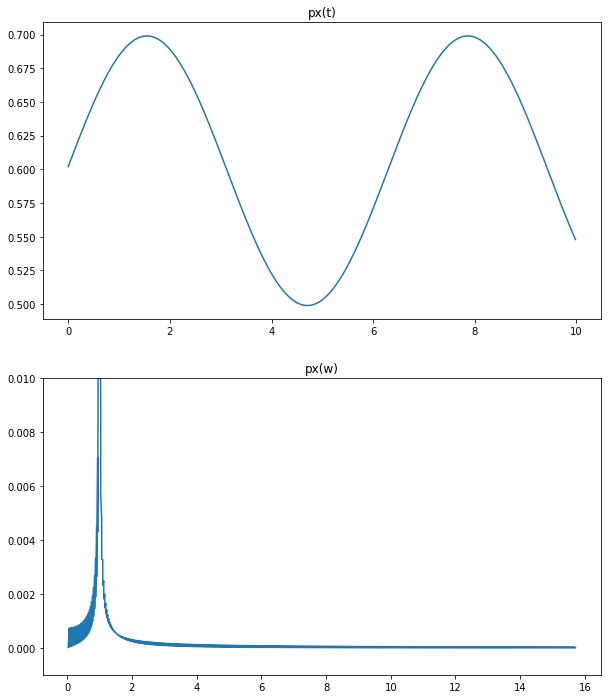

In [63]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import rfft, rfftfreq

t = np.asarray(range(TIME))*dt
f_t = particle_t[:,0]

w = rfftfreq(TIME, dt)*2*np.pi
f_w = rfft(f_t)

fig = plt.figure(figsize=(10,12))
ax1 = fig.add_subplot(211); ax1.set_title('px(t)')
ax2 = fig.add_subplot(212, ylim=(-0.001,0.01)); ax2.set_title('px(w)')

f_t_ = ax1.plot(t[:500], f_t[:500])
f_w_ = ax2.plot(w[2:1000], np.abs(f_w[2:1000])/len(f_w))

#fig.savefig('px(t), px(w) 20201118.png')

In [57]:
#########/ data initializing /#################################################
import numpy as np
particle_t = []

with open("particles_data.txt", 'r') as f:
    TIME_dt = f.readline().split(' ')
    TIME = (int)(TIME_dt[0])
    dt = (float)(TIME_dt[1])
    SIZE_X_Y = f.readline().split(' ')
    SIZE_X = (float)(SIZE_X_Y[0])
    SIZE_Y = (float)(SIZE_X_Y[1])
    for t in range (TIME):
        temp = f.readline()[:-1]
        particle_t.append([float(temp.split(' ')[0]), float(temp.split(' ')[1])])
        
particle_t = np.asarray(particle_t)

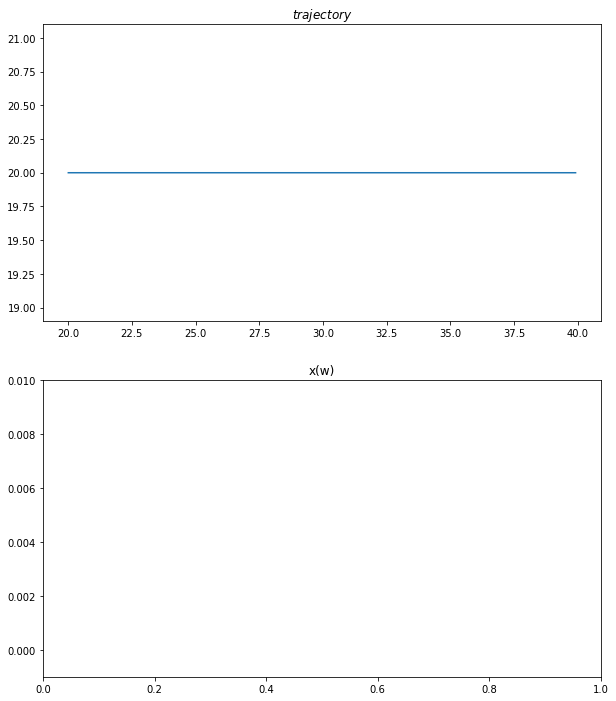

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,12))
ax1 = fig.add_subplot(211); ax1.set_title('$trajectory$')
ax2 = fig.add_subplot(212, ylim=(-0.001,0.01)); ax2.set_title('x(w)')

traj_ = ax1.plot(particle_t[:10010,0], particle_t[:10010,1])

#fig.savefig('px(t), px(w) 20201118.png')